In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# mpl.use('pgf') # for latex

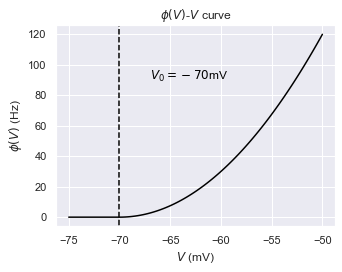

In [5]:
# 2

def phi(k, V, V0, n):
    VV = V - V0
    phi_v = (VV>0) * k * np.power(VV, n)
    return phi_v

k = 0.3
V0 = -70
n = 2
V = np.linspace(-75, -50, 100)

phi_V = phi(k=k, V=V, V0=V0, n=n)

fig, ax = plt.subplots(1, 1, figsize=(5,3.7))
ax.plot(V, phi_V, color='black')
ax.set_ylabel('$\phi(V)$ (Hz)')
ax.set_xlabel('$V$ (mV)')
ax.set_title('$\phi(V)$-$V$ curve')
plt.axvline(x = -70, ymin = -10, ymax = 130, linestyle = "dashed", color='black')
plt.text(-67,90,"$V_0=-70$mV",fontdict={'color':'black'})
plt.show()
# plt.savefig('1.pgf', format='pgf')

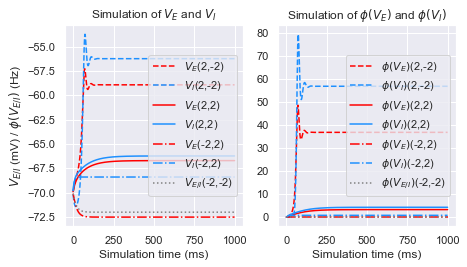

In [6]:
# 3

def EIND(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, u_EI, V0, k, n):
    V_EI = np.zeros([N_t+1,2])
    V_EI[0,] = V_EI_init
    phi_V_EI = np.zeros([N_t,2])
    for t in range(1,N_t+1):
        phi_V_EI[t-1,] = phi(k, V_EI[t-1,], V0, n)
        dV_EI = -(V_EI[t-1,] - V_rest) + np.dot(W_EI,phi_V_EI[t-1,]) + u_EI
        V_EI[t,] = V_EI[t-1,] + np.divide(1,tau_EI) * dt * dV_EI
    return V_EI, phi_V_EI

N_t = 1000
dt = 1
tau_EI = np.array([20,10])
V_rest = -70
V_EI_init = np.array([V_rest,V_rest])
W_EI = np.array([[1.25,-0.65],[1.2,-0.5]])
u_EI1 = np.array([2,2])
u_EI2 = np.array([2,-2])
u_EI3 = np.array([-2,2])
u_EI4 = np.array([-2,-2])
V0 = V_rest
k = 0.3
n = 2

V_EI1, phi_V_EI1 = EIND(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, u_EI1, V0, k, n)
V_EI2, phi_V_EI2 = EIND(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, u_EI2, V0, k, n)
V_EI3, phi_V_EI3 = EIND(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, u_EI3, V0, k, n)
V_EI4, phi_V_EI4 = EIND(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, u_EI4, V0, k, n)

fig, ax =  plt.subplots(1,2, sharex = True, figsize=(7,3.7))
label1 = ['$V_E$(2,2)','$V_I$(2,2)']
label2 = ['$\phi(V_E)$(2,2)','$\phi(V_I)$(2,2)']
label3 = ['$V_E$(2,-2)','$V_I$(2,-2)']
label4 = ['$\phi(V_E)$(2,-2)','$\phi(V_I)$(2,-2)']
label5 = ['$V_E$(-2,2)','$V_I$(-2,2)']
label6 = ['$\phi(V_E)$(-2,2)','$\phi(V_I)$(-2,2)']
color = ['red', 'dodgerblue']
for i in range(2):
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI2[1:,i], ls='--', label = label3[i], color = color[i])
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI2[:,i], ls='--', label = label4[i], color = color[i])
for i in range(2): 
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI1[1:,i], label = label1[i], color = color[i])
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI1[:,i], label = label2[i], color = color[i])
for i in range(2):
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI3[1:,i], ls='-.', label = label5[i], color = color[i])
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI3[:,i], ls='-.', label = label6[i], color = color[i])
ax[0].plot(np.arange(0, N_t*dt, dt), V_EI4[1:,0], ls=':', label = '$V_{E/I}$(-2,-2)', color = 'gray')
ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI4[:,0], ls=':', label = '$\phi(V_{E/I})$(-2,-2)', color = 'gray')
ax[0].set_title('Simulation of $V_E$ and $V_I$')
ax[1].set_title('Simulation of $\phi(V_E)$ and $\phi(V_I)$')
ax[0].set_ylabel('$V_{E/I}$ (mV) / $\phi(V_{E/I})$ (Hz)')
ax[0].set_xlabel('Simulation time (ms)')
ax[1].set_xlabel('Simulation time (ms)')
ax[0].legend(loc='center right')
ax[1].legend(loc='center right')
plt.show()
#p lt.savefig('2.pgf', format='pgf')

<ipython-input-16-18dee2745f6e>:58: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


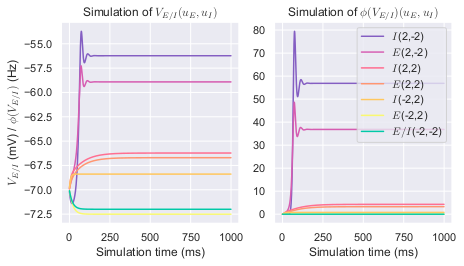

In [16]:
# 3(2)

def EIND(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, u_EI, V0, k, n):
    V_EI = np.zeros([N_t+1,2])
    V_EI[0,] = V_EI_init
    phi_V_EI = np.zeros([N_t,2])
    for t in range(1,N_t+1):
        phi_V_EI[t-1,] = phi(k, V_EI[t-1,], V0, n)
        dV_EI = -(V_EI[t-1,] - V_rest) + np.dot(W_EI,phi_V_EI[t-1,]) + u_EI
        V_EI[t,] = V_EI[t-1,] + np.divide(1,tau_EI) * dt * dV_EI
    return V_EI, phi_V_EI

N_t = 1000
dt = 1
tau_EI = np.array([20,10])
V_rest = -70
V_EI_init = np.array([V_rest,V_rest])
W_EI = np.array([[1.25,-0.65],[1.2,-0.5]])
u_EI1 = np.array([2,2])
u_EI2 = np.array([2,-2])
u_EI3 = np.array([-2,2])
u_EI4 = np.array([-2,-2])
V0 = V_rest
k = 0.3
n = 2

V_EI1, phi_V_EI1 = EIND(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, u_EI1, V0, k, n)
V_EI2, phi_V_EI2 = EIND(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, u_EI2, V0, k, n)
V_EI3, phi_V_EI3 = EIND(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, u_EI3, V0, k, n)
V_EI4, phi_V_EI4 = EIND(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, u_EI4, V0, k, n)

fig, ax =  plt.subplots(1,2, sharex = True, figsize=(7,3.7))
label1 = ['$E$(2,2)','$I$(2,2)']
label2 = ['$E$(2,-2)','$I$(2,-2)']
label3 = ['$E$(-2,2)','$I$(-2,2)']
color1 = ['#d65db1','#845ec2']
color2 = ['#ff9671','#ff6f91']
color3 = ['#f9f871','#ffc75f']
order = np.array([1,0])
for i in order:
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI2[1:,i], label = label2[i], \
               color = color1[i])
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI2[:,i], label = label2[i], \
               color = color1[i])
for i in order: 
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI1[1:,i], label = label1[i], \
               color = color2[i])
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI1[:,i], label = label1[i], \
               color = color2[i])
for i in order:
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI3[1:,i], label = label3[i], \
               color = color3[i])
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI3[:,i], label = label3[i], \
               color = color3[i])
ax[0].plot(np.arange(0, N_t*dt, dt), V_EI4[1:,0], label = '$E/I$(-2,-2)', \
           color = '#00c9a7')
ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI4[:,0], label = '$E/I$(-2,-2)', \
           color = '#00c9a7')
ax[0].set_title('Simulation of $V_{E/I}(u_E,u_I)$')
ax[1].set_title('Simulation of $\phi(V_{E/I})(u_E,u_I)$')
ax[0].set_ylabel('$V_{E/I}$ (mV) / $\phi(V_{E/I})$ (Hz)')
ax[0].set_xlabel('Simulation time (ms)')
ax[1].set_xlabel('Simulation time (ms)')
ax[1].legend(loc='upper right')
plt.show()
# plt.savefig('2.pgf', format='pgf')

In [46]:
tau_EI = np.array([[1,2],[3,4]])
x=np.array([3,10])
print(tau_EI)
print(x)
tau_EI[1,]
y=[[1],[2]]
x*y
z=1
print(tau_EI*x)
#print(np.divide(1,tau_EI))
#print(np.divide(1,tau_EI) * dt * dV_EI)
print(np.dot(tau_EI,x))

[[1 2]
 [3 4]]
[ 3 10]
[[ 3 20]
 [ 9 40]]
[23 49]


In [34]:
def phi(k, V, V0, n):
    VV = V - V0
    phi_v = (VV>0) * k * np.power(VV, n)
    return phi_v

k = 0.3
V0 = -70
n = 2
V = np.array([3,10])
phi_V = phi(k, V, V0, n)
print(phi_V)

[1598.7 1920. ]


In [42]:
tau_EI = np.array([20,10])
dV_EI = np.array([2,2])
print(np.divide(1,tau_EI))
print(np.divide(1,tau_EI) * 1 * dV_EI)

[0.05 0.1 ]
[0.1 0.2]


In [53]:
VV = np.array([5,10])
k=1
n=2
phi_v = (VV>0) * k * np.power(VV, n)
print(phi_v)

[ 25 100]


<ipython-input-64-fc9daca813a6>:87: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


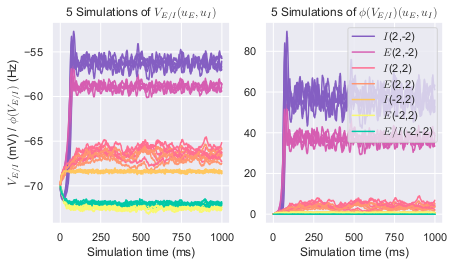

In [64]:
# 4

def EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI, sigma_EI, V0, k, n, seed):
    V_EI = np.zeros([N_t+1,2])
    V_EI[0,] = V_EI_init
    phi_V_EI = np.zeros([N_t,2])
    # introduce Gaussian white noise
    u_seed = np.random.RandomState(seed=seed)
    u_EI = mu_EI + 1/np.sqrt(dt) * sigma_EI * u_seed.randn(N_t,2)
    for t in range(1,N_t+1):
        phi_V_EI[t-1,] = phi(k, V_EI[t-1,], V0, n)
        dV_EI = -(V_EI[t-1,] - V_rest) + np.dot(W_EI,phi_V_EI[t-1,]) + u_EI[t-1,]
        V_EI[t,] = V_EI[t-1,] + np.divide(1,tau_EI) * dt * dV_EI
    return V_EI, phi_V_EI

N_t = 1000
dt = 1
tau_EI = np.array([20,10])
V_rest = -70
V_EI_init = np.array([V_rest,V_rest])
W_EI = np.array([[1.25,-0.65],[1.2,-0.5]])
mu_EI1 = np.array([2,2])
mu_EI2 = np.array([2,-2])
mu_EI3 = np.array([-2,2])
mu_EI4 = np.array([-2,-2])
sigma_EI = np.array([1,0.5])
V0 = V_rest
k = 0.3
n = 2
seed = np.array([1,2,3,4,5])

fig, ax =  plt.subplots(1,2, sharex = True, figsize=(7,3.7))
label1 = ['$E$(2,2)','$I$(2,2)']
label2 = ['$E$(2,-2)','$I$(2,-2)']
label3 = ['$E$(-2,2)','$I$(-2,2)']
color1 = ['#d65db1','#845ec2']
color2 = ['#ff9671','#ff6f91']
color3 = ['#f9f871','#ffc75f']
order = np.array([1,0])
s = 4
V_EI_noise1, phi_V_EI_noise1 = EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, \
                                          W_EI, mu_EI1, sigma_EI, V0, k, n, seed[s])
V_EI_noise2, phi_V_EI_noise2 = EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, \
                                          W_EI, mu_EI2, sigma_EI, V0, k, n, seed[s])
V_EI_noise3, phi_V_EI_noise3 = EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, \
                                          W_EI, mu_EI3, sigma_EI, V0, k, n, seed[s])
V_EI_noise4, phi_V_EI_noise4 = EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, \
                                          W_EI, mu_EI4, sigma_EI, V0, k, n, seed[s])   
for i in order: 
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI_noise2[1:,i], label = label2[i], \
               color = color1[i])
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_noise2[:,i], label = label2[i], \
               color = color1[i])
for i in order: 
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI_noise1[1:,i], label = label1[i], \
               color = color2[i])
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_noise1[:,i], label = label1[i], \
               color = color2[i])
for i in order: 
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI_noise3[1:,i], label = label3[i], \
               color = color3[i])
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_noise3[:,1], label = label3[i], \
               color = color3[i])
ax[0].plot(np.arange(0, N_t*dt, dt), V_EI_noise4[1:,0], label = '$E/I$(-2,-2)', \
           color = '#00c9a7')
ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_noise4[:,0], label = '$E/I$(-2,-2)', \
           color ='#00c9a7')
for s in range(4):
    V_EI_noise1, phi_V_EI_noise1 = \
        EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI1, sigma_EI, V0, k, n, seed[s])
    V_EI_noise2, phi_V_EI_noise2 = \
        EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI2, sigma_EI, V0, k, n, seed[s])
    V_EI_noise3, phi_V_EI_noise3 = \
        EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI3, sigma_EI, V0, k, n, seed[s])
    V_EI_noise4, phi_V_EI_noise4 = \
        EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI4, sigma_EI, V0, k, n, seed[s])   
    for i in order: 
        ax[0].plot(np.arange(0, N_t*dt, dt), V_EI_noise2[1:,i], color = color1[i])
        ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_noise2[:,i], color = color1[i])
    for i in order: 
        ax[0].plot(np.arange(0, N_t*dt, dt), V_EI_noise1[1:,i], color = color2[i])
        ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_noise1[:,i], color = color2[i])
    for i in order: 
        ax[0].plot(np.arange(0, N_t*dt, dt), V_EI_noise3[1:,i], color = color3[i])
        ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_noise3[:,1], color = color3[i])
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI_noise4[1:,0], color = '#00c9a7')
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_noise4[:,0], color ='#00c9a7')
ax[0].set_title('5 Simulations of $V_{E/I}(u_E,u_I)$')
ax[1].set_title('5 Simulations of $\phi(V_{E/I})(u_E,u_I)$')
ax[0].set_ylabel('$V_{E/I}$ (mV) / $\phi(V_{E/I})$ (Hz)')
ax[0].set_xlabel('Simulation time (ms)')
ax[1].set_xlabel('Simulation time (ms)')
#ax[0].legend(loc='center right')
ax[1].legend(loc='upper right')
plt.show()
plt.savefig('3.pgf', format='pgf')

<ipython-input-17-66ce2b149234>:55: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


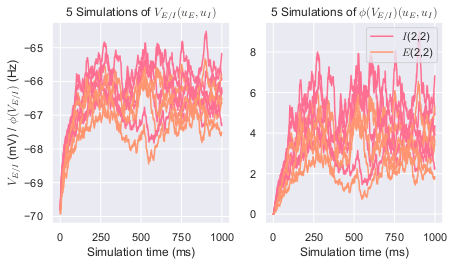

In [17]:
# 4(2)

def EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI, sigma_EI, V0, k, n, seed):
    V_EI = np.zeros([N_t+1,2])
    V_EI[0,] = V_EI_init
    phi_V_EI = np.zeros([N_t,2])
    # introduce Gaussian white noise
    u_seed = np.random.RandomState(seed=seed)
    u_EI = mu_EI + 1/np.sqrt(dt) * sigma_EI * u_seed.randn(N_t,2)
    for t in range(1,N_t+1):
        phi_V_EI[t-1,] = phi(k, V_EI[t-1,], V0, n)
        dV_EI = -(V_EI[t-1,] - V_rest) + np.dot(W_EI,phi_V_EI[t-1,]) + u_EI[t-1,]
        V_EI[t,] = V_EI[t-1,] + np.divide(1,tau_EI) * dt * dV_EI
    return V_EI, phi_V_EI

N_t = 1000
dt = 1
tau_EI = np.array([20,10])
V_rest = -70
V_EI_init = np.array([V_rest,V_rest])
W_EI = np.array([[1.25,-0.65],[1.2,-0.5]])
mu_EI1 = np.array([2,2])
mu_EI2 = np.array([2,-2])
mu_EI3 = np.array([-2,2])
mu_EI4 = np.array([-2,-2])
sigma_EI = np.array([1,0.5])
V0 = V_rest
k = 0.3
n = 2
seed = np.array([1,2,3,4,5])

fig, ax =  plt.subplots(1,2, sharex = True, figsize=(7,3.7))
label1 = ['$E$(2,2)','$I$(2,2)']
color2 = ['#ff9671','#ff6f91']
order = np.array([1,0])
s = 4
V_EI_noise1, phi_V_EI_noise1 = \
    EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI1, sigma_EI, \
               V0, k, n, seed[s])
for i in order: 
    ax[0].plot(np.arange(0, N_t*dt, dt), V_EI_noise1[1:,i], label = label1[i], \
               color = color2[i])
    ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_noise1[:,i], label = label1[i], \
               color = color2[i])
for s in range(4):
    V_EI_noise1, phi_V_EI_noise1 = \
        EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI1, sigma_EI, \
                   V0, k, n, seed[s]) 
    for i in order: 
        ax[0].plot(np.arange(0, N_t*dt, dt), V_EI_noise1[1:,i], color = color2[i])
        ax[1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_noise1[:,i], color = color2[i])
ax[0].set_title('5 Simulations of $V_{E/I}(u_E,u_I)$')
ax[1].set_title('5 Simulations of $\phi(V_{E/I})(u_E,u_I)$')
ax[0].set_ylabel('$V_{E/I}$ (mV) / $\phi(V_{E/I})$ (Hz)')
ax[0].set_xlabel('Simulation time (ms)')
ax[1].set_xlabel('Simulation time (ms)')
ax[1].legend(loc='upper right')
plt.show()
# plt.savefig('3.pgf', format='pgf')

In [108]:
x=np.array([10,20])
y=np.array([-1,1])
np.random.randn(4,2)*x+x*y
np.random.randn(4,2)

array([[ 0.4065081 , -0.27371545],
       [-0.71489776,  0.17259265],
       [ 1.3868035 ,  0.28299791],
       [ 1.90031077, -2.87757936]])

<ipython-input-29-7b64cb95bbca>:88: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


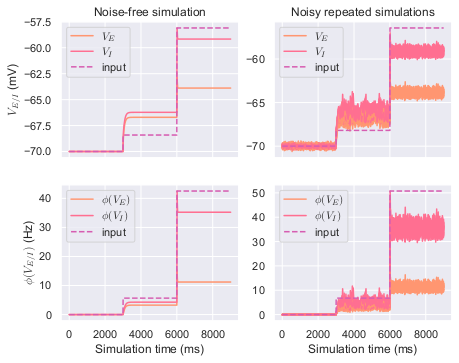

In [29]:
# 5

def EIND_mean_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI, sigma_EI, \
                    V0, k, n, seed, interval, noise=False):
    V_EI = np.zeros([N_t+1,2])
    V_EI[0,] = V_EI_init
    phi_V_EI = np.zeros([N_t,2])
    # introduce increasing mean
    u_EI = np.zeros([N_t,2])
    for i in range(mu_EI.shape[0]):
        u_EI[i*interval:(i+1)*interval] = mu_EI[i,]
    # introduce Gaussian white noise when noise = True
    if(noise==True):
        u_seed = np.random.RandomState(seed=seed)
        u_EI = u_EI + 1/np.sqrt(dt) * sigma_EI * u_seed.randn(N_t,2)
    for t in range(1,N_t+1):
        phi_V_EI[t-1,] = phi(k, V_EI[t-1,], V0, n)
        dV_EI = -(V_EI[t-1,] - V_rest) + np.dot(W_EI,phi_V_EI[t-1,]) + u_EI[t-1,]
        V_EI[t,] = V_EI[t-1,] + np.divide(1,tau_EI) * dt * dV_EI
    return V_EI, phi_V_EI

N_t = 9000
dt = 1
tau_EI = np.array([20,10])
V_rest = -70
V_EI_init = np.array([V_rest,V_rest])
W_EI = np.array([[1.25,-0.65],[1.2,-0.5]])
mu_EI = np.array([[0,0],[2,2],[15,15]])
sigma_EI = np.array([1,0.5])
V0 = V_rest
k = 0.3
n = 2
seed = 2032451
interval = 3000

V_EI_mean_noise_free, phi_V_EI_mean_noise_free = \
EIND_mean_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI, sigma_EI, \
                V0, k, n, seed, interval, noise=False)
V_EI_mean_noise, phi_V_EI_mean_noise = \
EIND_mean_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI, sigma_EI, \
                V0, k, n, seed, interval, noise=True)

fig, ax =  plt.subplots(2,2, sharex = True, figsize=(7,5.5))
label1 = ['$V_E$','$V_I$']
label2 = ['$\phi(V_E)$','$\phi(V_I)$']
u_EI = np.zeros([N_t])
color = ['#ff9671','#ff6f91']
max_mu = np.max(mu_EI[:,0])
max_V = np.max(V_EI_mean_noise[1:,])-np.min(V_EI_mean_noise[1:,])
max_phi = np.max(phi_V_EI_mean_noise[:,])-np.min(phi_V_EI_mean_noise[:,])
for i in range(mu_EI.shape[0]):
        u_EI[i*interval:(i+1)*interval] = mu_EI[i,0]/max_mu
for i in range(2): 
    ax[0,0].plot(np.arange(0, N_t*dt, dt), V_EI_mean_noise_free[1:,i], \
                 label = label1[i], color = color[i])
    ax[1,0].plot(np.arange(0, N_t*dt, dt), phi_V_EI_mean_noise_free[:,i], \
                 label = label2[i], color = color[i])
    ax[0,1].plot(np.arange(0, N_t*dt, dt), V_EI_mean_noise[1:,i], \
                 label = label1[i], color = color[i])
    ax[1,1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_mean_noise[:,i], \
                 label = label2[i], color = color[i])
ax[0,0].plot(np.arange(0, N_t*dt, dt), u_EI*(np.max(V_EI_mean_noise_free[1:,])-\
                                             np.min(V_EI_mean_noise_free[1:,]))-70,\
             linestyle = "dashed", color='#d65db1', label = "input")
ax[1,0].plot(np.arange(0, N_t*dt, dt), u_EI*(np.max(phi_V_EI_mean_noise_free[:,])-\
                                             np.min(phi_V_EI_mean_noise_free[:,])),\
             linestyle = "dashed", color='#d65db1', label = "input")
for s in range(9):
    V_EI_mean_noise, phi_V_EI_mean_noise = \
    EIND_mean_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI, sigma_EI, \
                    V0, k, n, s, interval, noise=True)
    max_V = np.max([max_V, np.max(V_EI_mean_noise[1:,])-\
                    np.min(V_EI_mean_noise[1:,])])
    max_phi = np.max([max_phi, np.max(phi_V_EI_mean_noise[:,])-\
                      np.min(phi_V_EI_mean_noise[:,])])
    for i in range(2):
        ax[0,1].plot(np.arange(0, N_t*dt, dt), V_EI_mean_noise[1:,i], \
                     color = color[i])
        ax[1,1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_mean_noise[:,i], \
                     color = color[i])
ax[0,1].plot(np.arange(0, N_t*dt, dt), u_EI*max_V-70,\
             linestyle = "dashed", color='#d65db1', label = "input")
ax[1,1].plot(np.arange(0, N_t*dt, dt), u_EI*max_phi,\
             linestyle = "dashed", color='#d65db1', label = "input")   
ax[0,0].set_title('Noise-free simulation')
ax[0,1].set_title('Noisy repeated simulations')
ax[0,0].set_ylabel('$V_{E/I}$ (mV)')
ax[1,0].set_ylabel('$\phi(V_{E/I})$ (Hz)')
ax[1,0].set_xlabel('Simulation time (ms)')
ax[1,1].set_xlabel('Simulation time (ms)')
ax[0,0].legend(loc='upper left')
ax[1,0].legend(loc='upper left')
ax[0,1].legend(loc='upper left')
ax[1,1].legend(loc='upper left')
plt.show()
# plt.savefig('4.pgf', format='pgf')

In [143]:
x=np.array([[1,2],[3,4]])
x.shape[0]
mu_EI = np.array([[0,0],[2,2],[15,15]])
mu_EI.shape
for i in range(mu_EI.shape[0]):
    print(i)
n=np.zeros([5,2])
p=np.array([1,2])
n[1:3,]=p
print(n)
print(mu_EI[1:3,])

0
1
2
[[0. 0.]
 [1. 2.]
 [1. 2.]
 [0. 0.]
 [0. 0.]]
[[ 2  2]
 [15 15]]


In [63]:
# 6a

N_t = 2000
dt = 1
tau_EI = np.array([20,10])
V_rest = -70
V_EI_init = np.array([V_rest,V_rest])
W_EI = np.array([[1.25,-0.65],[1.2,-0.5]])
#mu_EI_minmax = np.array([[0,0],[20,20]])
#grid = 5
#mu_EI = np.linspace(mu_EI_minmax[0,], mu_EI_minmax[1,], grid)
sigma_EI = np.array([1,0.5])
V0 = V_rest
k = 0.3
n = 2
seed = 2032451

fig, ax =  plt.subplots(1,1, figsize=(6,4))
label = ['$\mu=0$','$\mu=5$','$\mu=10$','$\mu=15$','$\mu=20$']
color = ['#f9f871','#ffc75f','#ff6f91','#d65db1','#845ec2']
for i in range(5):
    mu_EI = 5*i
    V_EI_noise, phi_V_EI_noise = \
    EIND_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI, sigma_EI, V0, k, n, seed)
    ax.plot(np.arange(0, N_t*dt, dt), V_EI_noise[1:,1], label = label[i], color=color[i])
    #ax.plot(np.arange(0, N_t*dt, dt), V_EI_noise[1:,1], label = label1[1])
ax.set_title('Noisy $u_E$ and $u_I$ under varying $\mu$')
ax.set_ylabel('$V_I$ (mV)')
ax.set_xlabel('Simulation time (ms)')
ax.legend(loc='center right')
plt.axvline(x = 500, ymin = -100, ymax = 100, linestyle = "dashed", color = 'black')
plt.show()
plt.savefig('5.pgf', format='pgf')

<ipython-input-63-0bf265e917b4>:32: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<ipython-input-19-f93851e79972>:74: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


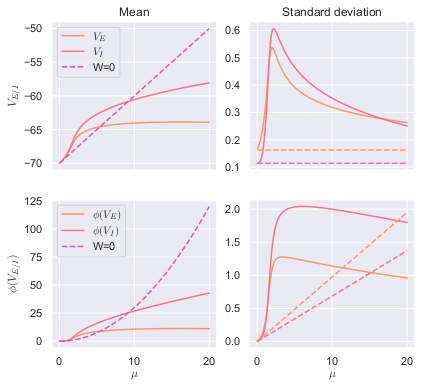

In [19]:
# 6b

def EIND_stat(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI_minmax, sigma_EI, \
              V0, k, n, seed, grid, truncate):
    mean_V_EI = np.zeros([grid,2])
    mean_phi_V_EI = np.zeros([grid,2])
    std_V_EI = np.zeros([grid,2])
    std_phi_V_EI = np.zeros([grid,2])
    mu_EI = np.linspace(mu_EI_minmax[0,], mu_EI_minmax[1,], grid)
    for i in range(grid):
        V_EI = np.zeros([N_t+1,2])
        V_EI[0,] = V_EI_init
        phi_V_EI = np.zeros([N_t,2])
        # introduce Gaussian white noise
        u_seed = np.random.RandomState(seed=seed)
        u_EI = mu_EI[i,] + 1/np.sqrt(dt) * sigma_EI * u_seed.randn(N_t,2)
        for t in range(1,N_t+1):
            phi_V_EI[t-1,] = phi(k, V_EI[t-1,], V0, n)
            dV_EI = -(V_EI[t-1,] - V_rest) + np.dot(W_EI,phi_V_EI[t-1,]) + u_EI[t-1,]
            V_EI[t,] = V_EI[t-1,] + np.divide(1,tau_EI) * dt * dV_EI
        mean_V_EI[i,] = np.mean(V_EI[truncate:,],axis=0)
        mean_phi_V_EI[i,] = np.mean(phi_V_EI[truncate:,],axis=0)
        std_V_EI[i,] = np.std(V_EI[truncate:,],axis=0)
        std_phi_V_EI[i,] = np.std(phi_V_EI[truncate:,],axis=0)
    return mean_V_EI, mean_phi_V_EI, std_V_EI, std_phi_V_EI

N_t = 10000
dt = 1
tau_EI = np.array([20,10])
V_rest = -70
V_EI_init = np.array([V_rest,V_rest])
W_EI = np.array([[1.25,-0.65],[1.2,-0.5]])
W_EI_0 = np.array([[0.,0.],[0.,0.]])
mu_EI_minmax = np.array([[0,0],[20,20]])
sigma_EI = np.array([1,0.5])
V0 = V_rest
k = 0.3
n = 2
seed = 2032451
grid = 100
truncate = 500

mean_V_EI, mean_phi_V_EI, std_V_EI, std_phi_V_EI = \
    EIND_stat(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI_minmax, sigma_EI, \
              V0, k, n, seed, grid, truncate)
mean_V_EI_W0, mean_phi_V_EI_W0, std_V_EI_W0, std_phi_V_EI_W0 = \
    EIND_stat(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI_0, mu_EI_minmax, sigma_EI, \
              V0, k, n, seed, grid, truncate)

fig, ax =  plt.subplots(2,2, sharex = True, figsize=(7,6))
label1 = ['$V_E$','$V_I$']
label2 = ['$\phi(V_E)$','$\phi(V_I)$']
label21 = ['$V_E$ (W=0)','$V_I$ (W=0)']
label22 = ['$\phi(V_E)$ (W=0)','$\phi(V_I)$ (W=0)']
color = ['#ff9671','#ff6f91']
for i in range(2): 
    ax[0,0].plot(np.linspace(mu_EI_minmax[0,0], mu_EI_minmax[1,0], grid), \
                 mean_V_EI[:,i], label = label1[i], color=color[i])
    ax[1,0].plot(np.linspace(mu_EI_minmax[0,1], mu_EI_minmax[1,1], grid), \
                 mean_phi_V_EI[:,i], label = label2[i], color=color[i])
    ax[0,1].plot(np.linspace(mu_EI_minmax[0,0], mu_EI_minmax[1,0], grid), \
                 std_V_EI[:,i], label = label1[i], color=color[i])
    ax[1,1].plot(np.linspace(mu_EI_minmax[0,1], mu_EI_minmax[1,1], grid), \
                 std_phi_V_EI[:,i], label = label2[i], color=color[i])
for i in range(2):
    ax[0,1].plot(np.linspace(mu_EI_minmax[0,0], mu_EI_minmax[1,0], grid), \
                 std_V_EI_W0[:,i], label = label21[i], \
                 linestyle = "dashed", color=color[i])
    ax[1,1].plot(np.linspace(mu_EI_minmax[0,1], mu_EI_minmax[1,1], grid), \
                 std_phi_V_EI_W0[:,i], label = label22[i], \
                 linestyle = "dashed", color=color[i])
ax[0,0].plot(np.linspace(mu_EI_minmax[0,0], mu_EI_minmax[1,0], grid), \
             mean_V_EI_W0[:,0], label = "W=0", \
             linestyle = "dashed", color='#d65db1')
ax[1,0].plot(np.linspace(mu_EI_minmax[0,1], mu_EI_minmax[1,1], grid), \
             mean_phi_V_EI_W0[:,0], label = "W=0", \
             linestyle = "dashed", color='#d65db1')
ax[0,0].set_title('Mean')
ax[0,1].set_title('Standard deviation')
ax[0,0].set_ylabel('$V_{E/I}$')
ax[1,0].set_ylabel('$\phi(V_{E/I})$')
ax[1,0].set_xlabel('$\mu$')
ax[1,1].set_xlabel('$\mu$')
ax[0,0].legend(loc='upper left')
ax[1,0].legend(loc='upper left')
plt.show()
# plt.savefig('6.pgf', format='pgf') # plot 5 eliminated

In [171]:
x=np.array([[0,5],[10,20]])
q=np.linspace(0,20,5)
q
p=np.linspace(x[0,],x[1,],5)
p

array([[ 0.  ,  5.  ],
       [ 2.5 ,  8.75],
       [ 5.  , 12.5 ],
       [ 7.5 , 16.25],
       [10.  , 20.  ]])

In [23]:
x=np.array([[0,5],[10,20],[100,200]])
print(np.mean(x[:,0]))
print(np.mean(x,axis=0))
x=np.array([0,1,2,3,4,5])
print(x[1:])

36.666666666666664
[36.66666667 75.        ]
[1 2 3 4 5]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


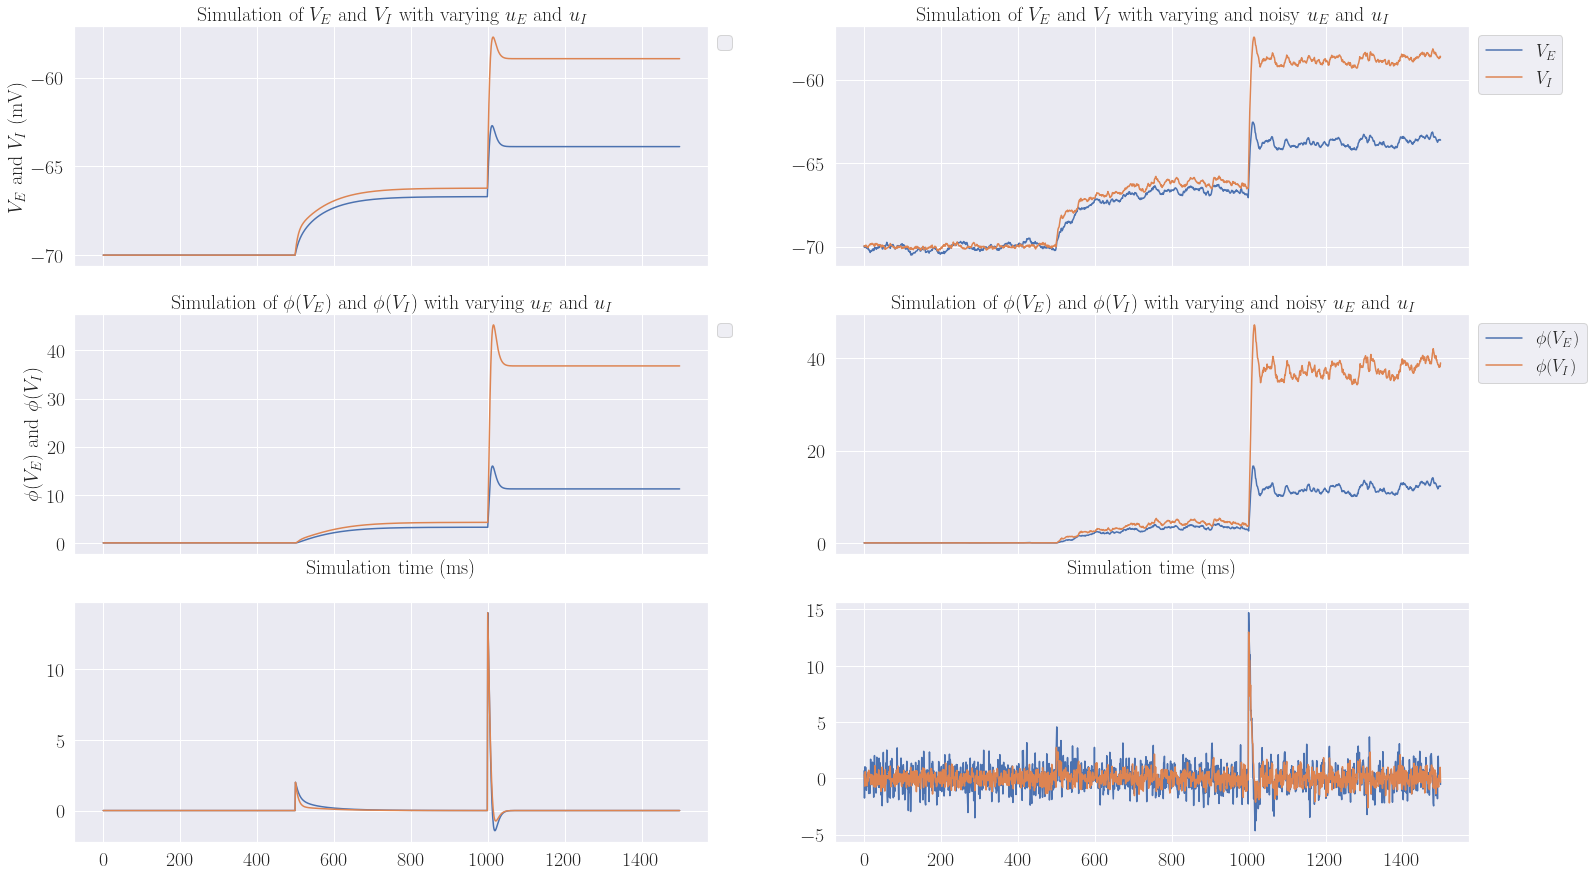

In [49]:
# 5_TEST

def EIND_mean_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI, sigma_EI, V0, k, n, seed, interval, noise=False):
    V_EI = np.zeros([N_t+1,2])
    V_EI[0,] = V_EI_init
    phi_V_EI = np.zeros([N_t,2])
    dV_EI = np.zeros([N_t,2])
    # introduce increasing mean
    u_EI = np.zeros([N_t,2])
    for i in range(mu_EI.shape[0]):
        u_EI[i*interval:(i+1)*interval] = mu_EI[i,]
    # introduce Gaussian white noise when noise = True
    if(noise==True):
        u_seed = np.random.RandomState(seed=seed)
        u_EI = u_EI + 1/np.sqrt(dt) * sigma_EI * u_seed.randn(N_t,2)
    for t in range(1,N_t+1):
        phi_V_EI[t-1,] = phi(k, V_EI[t-1,], V0, n)
        dV_EI[t-1,] = -(V_EI[t-1,] - V_rest) + np.dot(W_EI,phi_V_EI[t-1,]) + u_EI[t-1,]
        V_EI[t,] = V_EI[t-1,] + np.divide(1,tau_EI) * dt * dV_EI[t-1,]
    return V_EI, phi_V_EI, dV_EI

N_t = 1500
dt = 1
tau_EI = np.array([20,10])
V_rest = -70
V_EI_init = np.array([V_rest,V_rest])
W_EI = np.array([[1.25,-0.65],[1.2,-0.5]])
mu_EI = np.array([[0,0],[2,2],[16,16]])
sigma_EI = np.array([1,0.5])
V0 = V_rest
k = 0.3
n = 2
seed = 2032451
interval = 500

V_EI_mean_noise_free, phi_V_EI_mean_noise_free, dV_EI_mean_noise_free = \
    EIND_mean_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI, sigma_EI, V0, k, n, seed, interval, noise=False)
V_EI_mean_noise, phi_V_EI_mean_noise, dV_EI_mean_noise = \
    EIND_mean_noise(N_t, dt, tau_EI, V_rest, V_EI_init, W_EI, mu_EI, sigma_EI, V0, k, n, seed, interval, noise=True)

fig, ax =  plt.subplots(3,2, sharex = True, figsize=(25,15))
label1 = ['$V_E$','$V_I$']
label2 = ['$\phi(V_E)$','$\phi(V_I)$']
for i in range(2): 
    ax[0,0].plot(np.arange(0, N_t*dt, dt), V_EI_mean_noise_free[1:,i])
    ax[1,0].plot(np.arange(0, N_t*dt, dt), phi_V_EI_mean_noise_free[:,i])
    ax[0,1].plot(np.arange(0, N_t*dt, dt), V_EI_mean_noise[1:,i], label = label1[i])
    ax[1,1].plot(np.arange(0, N_t*dt, dt), phi_V_EI_mean_noise[:,i], label = label2[i])
    ax[2,0].plot(np.arange(0, N_t*dt, dt), dV_EI_mean_noise_free[:,i], label = label1[i])
    ax[2,1].plot(np.arange(0, N_t*dt, dt), dV_EI_mean_noise[:,i], label = label2[i])
ax[0,0].set_title('Simulation of $V_E$ and $V_I$ with varying $u_E$ and $u_I$')
ax[1,0].set_title('Simulation of $\phi(V_E)$ and $\phi(V_I)$ with varying $u_E$ and $u_I$')
ax[0,1].set_title('Simulation of $V_E$ and $V_I$ with varying and noisy $u_E$ and $u_I$')
ax[1,1].set_title('Simulation of $\phi(V_E)$ and $\phi(V_I)$ with varying and noisy $u_E$ and $u_I$')
ax[0,0].set_ylabel('$V_E$ and $V_I$ (mV)')
ax[1,0].set_ylabel('$\phi(V_E)$ and $\phi(V_I)$')
ax[1,0].set_xlabel('Simulation time (ms)')
ax[1,1].set_xlabel('Simulation time (ms)')
ax[0,0].legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 18)
ax[0,1].legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 18)
ax[1,0].legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 18)
ax[1,1].legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 18)
plt.show()

In [51]:
print(np.max(V_EI_mean_noise_free[:,0]))
print(np.argmax(V_EI_mean_noise_free[:,0]))


-62.70373341425147
1012


In [55]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [18]:
msg = '\033[41;1m字符串内容\033[0m'
print(msg)

字符串内容


In [23]:
print("\033[30mSuixinBlog: httpsuixinblog.cn\033[0m")
print("$V_\033[31mE\033[0m$")
print("\033[32mSuixinBlog: httxinblog.cn\033[0m")
print("\033[4;33mSuixinBlog: httpuixinblog.cn\033[0m")
print("\033[34mSuixinBlog: httpixinblog.cn\033[0m")
print("\033[1;35mSuixinBlog: ht/suixinblog.cn\033[0m")
print("\033[4;36mSuixinBlog: httpsuixinblog.cn\033[0m")
print("\033[37mSuixinBlog: httpsuixinblog.cn\033[0m")

SuixinBlog: httpsuixinblog.cn
$V_E$
SuixinBlog: httxinblog.cn
SuixinBlog: httpuixinblog.cn
SuixinBlog: httpixinblog.cn
SuixinBlog: ht/suixinblog.cn
SuixinBlog: httpsuixinblog.cn
SuixinBlog: httpsuixinblog.cn


In [24]:
np.max([1,2])

2